In [ ]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import contextily as ctx

In [2]:
# Create a connection to ArcGIS Online (anonymous or with credentials)
gis = GIS()  # Connects as an anonymous user
# or
# gis = GIS("https://www.arcgis.com", "username", "password")  # For a named user login


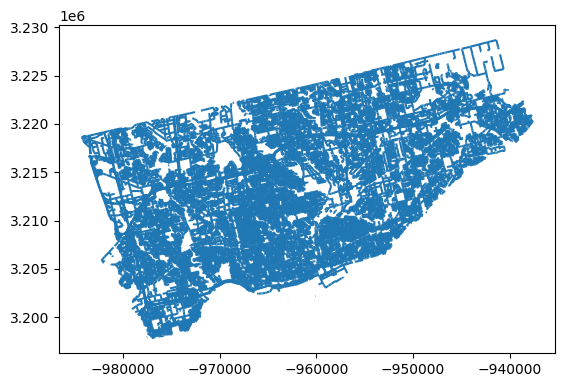

In [38]:
# Load the shapefile
gdf = gpd.read_file("D:\\微云同步助手\\332667113\\2025-省基金申请-NEE\\0-研究进程\\2024-UofT_NEE reports\\Correct_shapefiles_with_note_from_Matt\\Toronto_Road_EF_Emission.shp")

# Plot using Geopandas
gdf.plot()
plt.show()



In [89]:
print(gdf.columns)

Index(['OBJECTID_1', 'gid', 'geo_id', 'lfn_id', 'lf_name', 'address_l',
       'address_r', 'oe_flag_l', 'oe_flag_r', 'lonuml', 'hinuml', 'lonumr',
       'hinumr', 'fnode', 'tnode', 'fcode', 'fcode_desc', 'juris_code',
       'objectid', 'lat', 'long', 'FID_1', 'gid_1', 'geo_id_1', 'lfn_id_1',
       'lf_name_1', 'fnode_1', 'tnode_1', 'fcode_1', 'fcode_de_1',
       'juris_co_1', 'objectid_2', 'lat_1', 'long_1', 'volume', 'speed_kmh',
       'roadtype', 'speed_mph', 'eepm10', 'bwp10', 'twp10', 'eepm25', 'bwp25',
       'twp25', 'Shape_Leng', 'Field1', 'OBJECTID_3', 'gid_12', 'geo_id_12',
       'lfn_id_12', 'lf_name_12', 'fnode_12', 'tnode_12', 'fcode_12',
       'fcode_de_2', 'juris_co_2', 'objectid_4', 'lat_12', 'long_12',
       'Shape_Le_1', 'volume_1', 'speed_km_1', 'roadtype_1', 'speed_mp_1',
       'ef100', 'ef106', 'ef107', 'ef110', 'ef116', 'ef117', 'emis100',
       'emis106', 'emis107', 'emis110', 'emis116', 'emis117', 'geometry',
       'quantile', 'color'],
      dtype='o

## from here, change plotted variables 

In [112]:

# Let's assume 'Shape_Length' is the column for which you want to compute quantiles
quantiles = gdf['emis107'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

# Assign a quantile category based on emissions
gdf['quantile'] = pd.cut(gdf['emis107'], bins=quantiles, include_lowest=True, labels=False)

print(quantiles)

# Define a color map
color_map = {0: 'lightblue', 1: 'yellow', 2: 'orange', 3: 'red'}

# Create a new column for color mapping
gdf['color'] = gdf['quantile'].map(color_map)

[3.09191348e+00 5.04004935e+02 1.23488027e+03 5.36951876e+03
 9.36422997e+05]


## from here, change the plot display

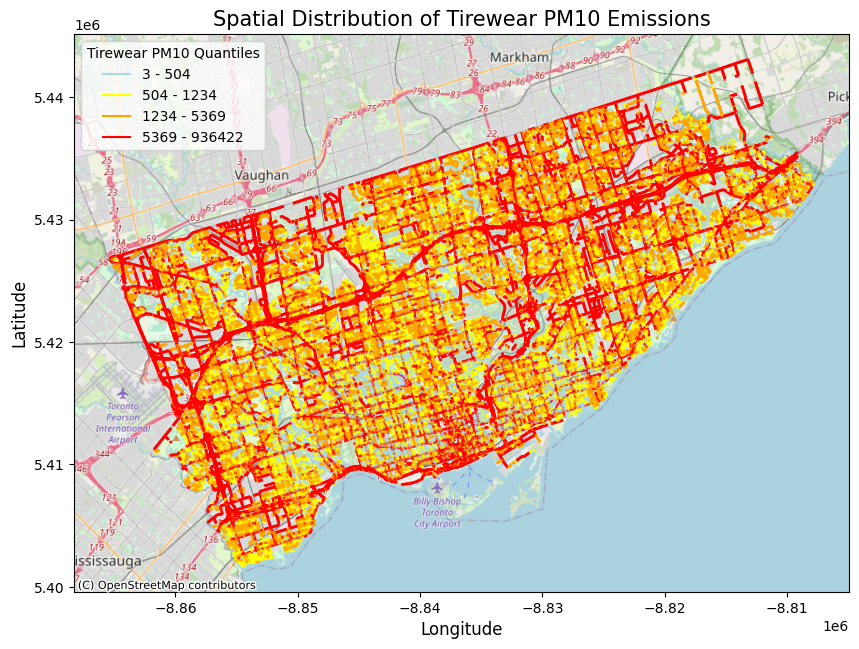

In [113]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
gdf.plot(ax=ax, color=gdf['color'], linewidth=2)

# Set titles and labels
ax.set_title("Spatial Distribution of Tirewear PM10 Emissions", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Plot the polylines
gdf.plot(ax=ax, color=gdf['color'], linewidth=2, alpha=0.7)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs)


# Add a legend
# Prepare legend labels with quantile values
legend_labels = [
    f"{int(quantiles[i])} - {int(quantiles[i + 1])}" for i in range(len(quantiles) - 1)
]

# Create the legend
for idx, label in enumerate(legend_labels):
    ax.plot([], [], color=color_map[idx], label=label)

ax.legend(title="Tirewear PM10 Quantiles", loc='upper left')



# plot the ratio of PM10 differences

In [133]:
gdf['PMDF'] = gdf['emis106'] - gdf['emis100']

# Let's assume 'Shape_Length' is the column for which you want to compute quantiles
quantiles = gdf['PMDF'].quantile([0, 0.25, 0.5, 0.75, 1]).values

# Assign a quantile category based on emissions
gdf['quantile'] = pd.cut(gdf['PMDF'], bins=quantiles, include_lowest=True, labels=False)

print(quantiles)

# Define a color map
color_map = {0: 'lightblue', 1: 'yellow', 2: 'orange', 3: 'red'}

# Create a new column for color mapping
gdf['color'] = gdf['quantile'].map(color_map)

[-2.14178464e+03  2.74444955e+03  6.61578809e+03  2.54356303e+04
  5.06521873e+06]


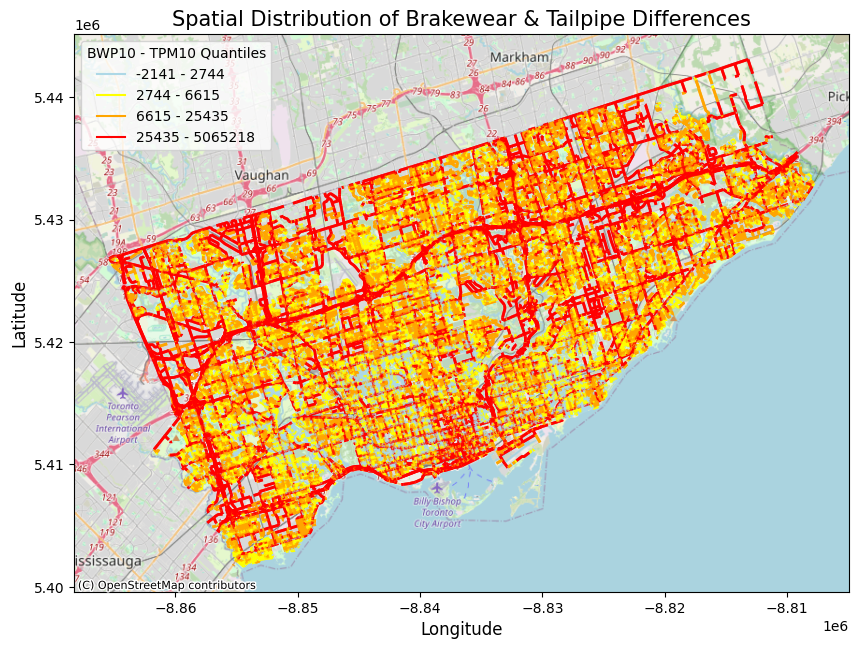

In [134]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
gdf.plot(ax=ax, color=gdf['color'], linewidth=2)

# Set titles and labels
ax.set_title("Spatial Distribution of Brakewear & Tailpipe Differences", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Plot the polylines
gdf.plot(ax=ax, color=gdf['color'], linewidth=2, alpha=0.7)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs)


# Add a legend
# Prepare legend labels with quantile values
legend_labels = [
    f"{int(quantiles[i])} - {int(quantiles[i + 1])}" for i in range(len(quantiles) - 1)
]

# Create the legend
for idx, label in enumerate(legend_labels):
    ax.plot([], [], color=color_map[idx], label=label)

ax.legend(title="BWP10 - TPM10 Quantiles", loc='upper left')



# Plot emission factors

[0.00078468 0.00136576 0.00142252 0.00152675]


C:\Users\turan\AppData\Local\Temp\ipykernel_18352\3672762269.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Tailpipe PM10 EF Quantiles (g/km)", loc='upper left')


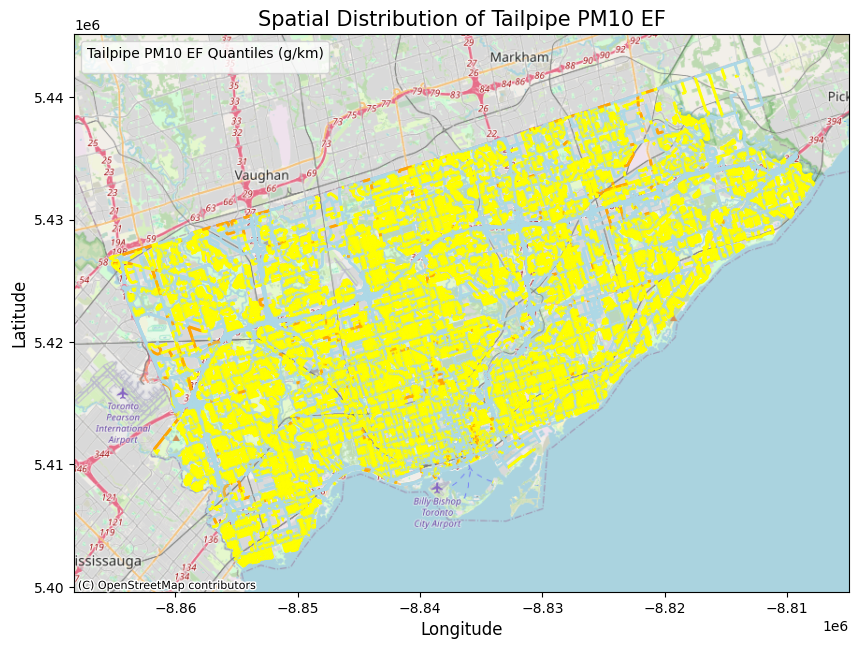

In [141]:
#gdf['EF'] = gdf['emis106'] - gdf['emis100']

# Let's assume 'Shape_Length' is the column for which you want to compute quantiles
quantiles = gdf['ef100'].quantile([0, 0.33, 0.67, 1]).values

# Assign a quantile category based on emissions
gdf['quantile'] = pd.cut(gdf['ef100'], bins=quantiles, include_lowest=True, labels=False)

print(quantiles)

# Define a color map
color_map = {0: 'lightblue', 1: 'yellow', 2: 'red'}

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
gdf.plot(ax=ax, color=gdf['color'], linewidth=2)

# Set titles and labels
ax.set_title("Spatial Distribution of Tailpipe PM10 EF", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)


# Add a legend
# Prepare legend labels with quantile values
# Create custom legend labels with quantile values rounded to 5 decimal points
legend_labels = [f"{quantile:.4f}" for quantile in quantiles]

# Update the legend with quantile labels
handles, labels = ax.get_legend_handles_labels()
for i, handle in enumerate(handles):
    handle.set_label(legend_labels[i])  # Set custom labels for legend

ax.legend(title="Tailpipe PM10 EF Quantiles (g/km)", loc='upper left')

# Plot the polylines
gdf.plot(ax=ax, color=gdf['color'], linewidth=2, alpha=0.7)



# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs)




# Header 1
## Header 2
### Header 3

- Bullet list item 1
- Bullet list item 2
  - Nested item

1. Numbered list item 1
2. Numbered list item 2

[Link text](https://example.com)
![Alt text](image.png)

**Bold text**  
*Italic text*
